# <a id='1'>Обзоры на приложения в Google Play Store</a>  

https://www.kaggle.com/gauthamp10/google-playstore-apps 

1. Подготовьте список самых популярных приложений по категориям
2. Какие приложения самые дорогие (и категории)
3. Какие категории содержат самое большое количество приложений без отзывов 

# Загрузка пакетов


In [14]:
import gc
import os
import logging
import datetime
import warnings
import pandas as pd
import seaborn as sns
from datetime import date

In [3]:
#установим пакет для курсов валют ЦБ
from pycbrf import ExchangeRates 

#####  Загрузка данных

In [4]:
IS_LOCAL = False
if(IS_LOCAL):
    PATH="https://www.kaggle.com/gauthamp10/google-playstore-apps"
else:
    PATH="data"
os.listdir(PATH)

['Google-Playstore.csv']

In [5]:
%%time
apps = pd.read_csv('data/Google-Playstore.csv')

Wall time: 14.1 s


### <a id='2'>АНАЛИЗ ДАННЫХ</a>  



## <a id='31'>Проверяем данные</a>  



In [6]:
apps.shape

(2312944, 24)

In [8]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [9]:
print(apps.columns)
apps.head(10)

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


###### Данные представляют собой таблицу в 24 столбца и 2312944 строк- приложения Google:
                        App Name         Имя приложения
                        App Id   Идентификатор приложения
                        Category  Категория
                        Rating  Оценка
                        Rating Count  Количество Рейтингов
                        Installs   Установка
                        Minimum Installs  Минимальные Установки
                        Maximum Installs  Максимальная Установка
                        Free   Бесплатно
                        Price   Цена
                        Currency  Валюта
                        Size   Размер
                        Minimum Android   Минимум Android
                        Developer Id    Идентификатор разработчика
                        Developer Website    Сайт разработчика
                        Developer Email   Электронная почта разработчика
                        Released   Выпущенный
                        Privacy Policy   Политика конфиденциальности
                        Last Updated   Последнее обновление
                        Content Rating   Рейтинг Контента
                        Ad Supported   Поддержка рекламы
                        In app purchases   Покупки в приложении
                        Editor Choice    Выбор редактора
                        Scraped Time   Собранное время


## <a id='31'>Проанализируем категории</a>  
И построим рейтинг популярности

In [20]:
#перечень категорий
np.unique(df['Category'].values)

array(['Action', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles',
       'Beauty', 'Board', 'Books & Reference', 'Business', 'Card',
       'Casino', 'Casual', 'Comics', 'Communication', 'Dating',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical',
       'Music', 'Music & Audio', 'News & Magazines', 'Parenting',
       'Personalization', 'Photography', 'Productivity', 'Puzzle',
       'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social',
       'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word'], dtype=object)

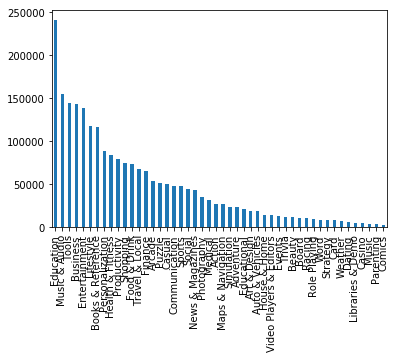

In [24]:
#посмотрим на количество приложений по категориям
pd.value_counts(df['Category']).plot.bar();

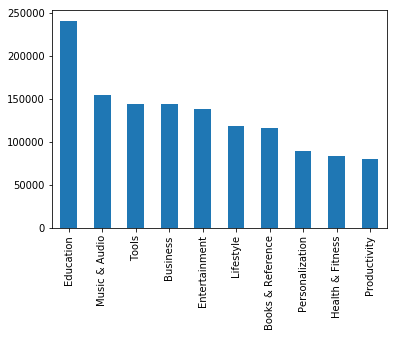

In [15]:
# Количество приложений по категориям -10 самых крупных
apps['Category'].value_counts().head(10).plot.bar()

In [11]:
# Топ N самых популярных приложений в каждой категории по рейтингу
N=10
categories = set(apps["Category"])
print(f"Всего {len(categories)} категорий")

for cat in categories:
    print(f"Топ {N} самых популярных приложений в категории {cat}:")
    most_popular = apps[apps["Category"] == cat].sort_values(by="Rating", ascending=False).head(N)
    print(most_popular[["App Name", "Rating"]])

Всего 48 категорий
Топ 10 самых популярных приложений в категории Weather:
                                                  App Name  Rating
2092299  Robot Anaconda Robot Car Transform: War Robot ...     5.0
602915                  Weather Updates & Weather Forecast     5.0
2232095   Fps Commando Shooting Strike: Gun Shooting Games     5.0
1727557                             Sudan Weather - Arabic     5.0
1727072                                      Windy Lookout     5.0
1232107                       National Weather Force (NWF)     5.0
133160   Modern Car Parking Simulator: Prado Car Games ...     5.0
363543                                       Hobby Weather     5.0
363627   Superhero Kung Fu Karate King Fight: Fighting ...     5.0
1244070                                           Prokriti     5.0
Топ 10 самых популярных приложений в категории Entertainment:
                                          App Name  Rating
1050200                Rey de Reyes - FM 102.7 Mhz     5.0
2055029 

                                     App Name  Rating
1737187  MemFlex - The Memory and Reflex Game     5.0
1406373                              Even Hit     5.0
2142271                         Crazy Roadway     5.0
714423                             Cube Shift     5.0
1540756                             Color Fit     5.0
110536                   CarryKins Hot & Cold     5.0
2142126                 JUMP ON : run to live     5.0
713364                              Bee Daily     5.0
2142109        FOX ADVENTURE - BUBBLE SHOOTER     5.0
203677                          Wizard Runner     5.0
Топ 10 самых популярных приложений в категории Education:
                                      App Name  Rating
636453                       Sou UPF Professor     5.0
1098251                                 مواريث     5.0
520344            Aspire Institute Of Commerce     5.0
1956783                       큐비 - 엔터큐브 스마트 시험     5.0
1732233              ACE APP - Ace your skills     5.0
207210      Agile 

                                                 App Name  Rating
432148                                            VEPOREL     5.0
474951                                              Ferri     5.0
2011352                       Employee Tracking Sense App     5.0
1791301                                IW People Counting     5.0
2104784                                              알바타임     5.0
815146                                        골고루보상 파트너전용     5.0
815053                          LoopMe Creative Portfolio     5.0
1791684                                        GRP Member     5.0
1295295                       Catalogo Palazzoli Lighting     5.0
1295389  ComAware – Commercial Awareness & Interview Tool     5.0
Топ 10 самых популярных приложений в категории Travel & Local:
                                           App Name  Rating
1315795                                LonelyBirder     5.0
1079361                               Audio-visites     5.0
667129                 Guía tur

                              App Name  Rating
1327952  Sathya Sai Aarti Bhajan Audio     5.0
1875468                      Lifeplace     5.0
1690040  Escuela de Judo Blas González     5.0
1476561               Waterlife Church     5.0
249092                   Box22 Storage     5.0
1975338              The Good Weddings     5.0
369640                          Locabo     5.0
513557                      El Sosiego     5.0
818036               Harjaspreet Singh     5.0
513560                          AdMeIn     5.0
Топ 10 самых популярных приложений в категории Simulation:
                                                  App Name  Rating
1288886  Fast Cooking Restaurant - Restaurant Cooking Game     5.0
281645                         City Parking Simulator 2019     5.0
1235874                  Ball O Mania : World Hardest Game     5.0
190243                           Aku Sehat Simulation Game     5.0
189722       3D Bus Oleng Indonesia - 50 Livery HD dan SHD     5.0
1815951               

In [12]:
# Топ N самых популярных приложений в каждой категории по количеству скачиваний
N=10
print(f"Всего {len(categories)} категорий")

for cat in categories:
    print(f"Топ {N} самых популярных приложений в категории {cat}:")
    most_popular = apps[apps["Category"] == cat].sort_values(by="Maximum Installs", ascending=False).head(N)
    print(most_popular[["App Name", "Maximum Installs"]])

Всего 48 категорий
Топ 10 самых популярных приложений в категории Weather:
                                                  App Name  Maximum Installs
1602029                                Weather - By Xiaomi         711617649
745276    Weather Radar & Live Widget: The Weather Channel         127314938
1375524                                       ASUS Weather         114400378
1139047   AccuWeather: Weather alerts & live forecast info         103141107
2301849                 Weather & Clock Widget for Android          77854192
389914   1Weather: Weather Forecast, Widget, Alerts & R...          72982566
1977090                     Weather & Radar - Storm alerts          69441313
2110365                                            Weather          69398542
1247963                                        HTC Weather          63722240
61836    Transparent clock and weather - forecast and r...          60130862
Топ 10 самых популярных приложений в категории Entertainment:
                

                             App Name  Maximum Installs
2155096          Google Play services       12057627016
1773294                        Google        9154248491
1060335         Google Text-to-Speech        9034404884
2011395   Android Accessibility Suite        7408134567
1429623        Android System WebView        4764329349
1366575  Gboard - the Google Keyboard        3897822063
1085721              Samsung My Files        2063336389
337866     Samsung Experience Service        1682763021
786925                    Device Care        1681485812
731501     SHAREit - Transfer & Share        1666016612
Топ 10 самых популярных приложений в категории Libraries & Demo:
                             App Name  Maximum Installs
2105180              HTC Service Pack          76374212
745798   MX Player Codec (ARMv7 NEON)          49842878
1674749   MX Player Codec (ARMv6 VFP)          48999723
93704         MX Player Codec (ARMv7)          43234525
1005688                     Cardboard  

                                          App Name  Maximum Installs
2222701                                   Facebook        6782619635
1108596                                   Currents        3929716163
304824                                   Instagram        3559871277
2278461                              Facebook Lite        2072296494
65037                                       TikTok        1645811582
1845543                                   Snapchat        1621265491
2079638                                    Twitter        1144061939
266182   BIGO LIVE–Live Stream, Live Chat, Go Live         402862640
300241                                 TikTok Lite         378784999
1847631            VK — live chatting & free calls         302398232
Топ 10 самых популярных приложений в категории House & Home:
                                                  App Name  Maximum Installs
2232616                        Universal TV Remote Control          96444714
2130092  Zillow: Find Hous

                                                  App Name  Maximum Installs
1126468     Google News - Top world & local news headlines        2961820154
416573                                            Briefing        1400441959
666744    Flipboard - Latest News, Top Stories & Lifestyle         794295006
29439                         upday for Samsung - Zeropage         187089891
1627590   Dailyhunt - Latest Local & National News, Videos         168615253
1722760          Opera News: Breaking Local & US Headlines         120143968
825646                                  News Suite by Sony          99230961
52355    Aaj Tak Live TV News - Latest Hindi India News...          77249386
1361440                         ZINIO - Magazine Newsstand          63160208
1298924   India News, Latest News App, Live News Headlines          53236722
Топ 10 самых популярных приложений в категории Card:
                                                  App Name  Maximum Installs
771773                 

                                                  App Name  Maximum Installs
1920675                                  Hill Climb Racing         780030129
1138170                                        Dr. Driving         437455768
760836                       Extreme Car Driving Simulator         390951656
935619                                       Traffic Rider         361017652
543723                                         Fun Race 3D         340370012
2221044                                      Traffic Racer         326314272
838666   Asphalt 8 Racing Game - Drive, Drift at Real S...         301248154
2104737                                     Real Racing  3         290620964
137608                                    Street Racing 3D         259458307
2079038                                    Racing in Car 2         245300129
Топ 10 самых популярных приложений в категории Educational:
                                               App Name  Maximum Installs
336867             

#### Переведем стоимость приложений в одну валюту -в рубли

In [16]:
#котировки валют
today = date.today().strftime("%Y-%m-%d")
print(f"Загружаем котировки валют за сегодня: {today}")
rates = ExchangeRates(today, locale_en=True)

Загружаем котировки валют за сегодня: 2021-07-10


In [25]:
#Проверим какие валюты можем перевести
currencies = set(apps["Currency"])
print(f"Всего {len(currencies)} валют")
print(currencies)
for currency in currencies:
    if(currency != 'XXX' and not pd.isna(currency)):
        rate = rates[currency]
        if(rate is not None):
            print(f"{currency}: {rates[currency].rate}")
        else:
            print(f"Валюта {currency} не определена")

Всего 16 валют
{'XXX', nan, 'ZAR', 'SGD', 'VND', 'BRL', 'KRW', 'TRY', 'AUD', 'RUB', 'GBP', 'CAD', 'INR', 'EUR', 'PKR', 'USD'}
ZAR: 5.21426
SGD: 54.9860
Валюта VND не определена
BRL: 14.1581
KRW: 0.0648765
TRY: 8.5798
AUD: 55.3889
Валюта RUB не определена
GBP: 102.6386
CAD: 59.4646
INR: 0.997803
EUR: 88.1397
Валюта PKR не определена
USD: 74.4675


In [ ]:
# UPD. PKR - пакистанская рупия, VND - вьетнамский донг, определим вручную...RUB и так рубль )

In [27]:
# Добавим колонку price_rub цена в рублях
handle_dict = {'PKR': 0.47, 'VND': 0.0032}
def get_price_rub(price, currency):
    total_rub = None
    if(currency != 'XXX' and not pd.isna(currency)):
        rate = rates[currency]
        if(rate is not None):
            total_rub = price * float(rate.rate)
        if(currency in handle_dict):
            total_rub = price * handle_dict[currency]
        if( currency == 'RUB'):
            total_rub = price
    return total_rub

Tests
0.0064
148.935
None


In [28]:
apps["Price_rub"] = apps.apply(lambda row: get_price_rub(row["Price"], row["Currency"]), axis=1)
apps_not_free = apps[(apps["Free"] == False)]
apps_not_free.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Price_rub
273,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,"10,000+",10000.0,34125,False,1.99,...,traista.rafael@yahoo.com,"Nov 30, 2018","Apr 08, 2019",Everyone,http://htmlpreview.github.io/?https://github.c...,False,False,False,2021-06-15 20:19:52,148.190325
296,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,"10,000+",10000.0,10407,False,4.99,...,help@hole19golf.com,"Feb 7, 2017","Dec 22, 2020",Everyone,https://www.hole19golf.com/terms/#PrivacyPolicy,False,False,False,2021-06-15 20:19:53,371.592825
417,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,"10,000+",10000.0,12019,False,0.99,...,light.makatea@gmail.com,"Oct 4, 2012","Feb 09, 2014",Everyone,NaN,False,False,False,2021-06-15 20:20:00,73.722825
554,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,1+,1.0,2,False,2.99,...,welcome@mail.soyong.com.tw,"Mar 15, 2017","Mar 15, 2017",Everyone,http://mobile.mebook-buy.com/android/privacy.html,False,False,False,2021-06-15 20:20:07,222.657825
618,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,1158.0,"10,000+",10000.0,23644,False,0.99,...,cuentas.brs@gmail.com,"Nov 3, 2020","Feb 05, 2021",Everyone,https://bestridesimulators.com/lunaria-games-s-l/,True,True,False,2021-06-15 20:20:11,73.722825
637,Bukuu - Akibat Menipu,bukuu.com.my.siri.haiwan.akibat.menipu,Education,0.0,0.0,1+,1.0,2,False,1.99,...,bukuu.mmsc@gmail.com,"Jan 12, 2016","Jan 13, 2016",Everyone,https://www.mmsc.com.my/bukuu/terma-penggunaan...,False,False,False,2021-06-15 20:20:13,148.190325
661,JOTNA MEDIA GROUP,com.app.jotnamediagroupi,Business,4.9,19.0,100+,100.0,487,False,4.99,...,kobe2die4@gmail.com,"Jun 15, 2020","Jun 15, 2020",Everyone,https://appcdn.media/privacy/?app=JOTNA%20MEDI...,True,False,False,2021-06-15 20:20:14,371.592825
775,"Web Development PRO (HTML, CSS)",com.technoapps.webdevelopmentpro,Education,4.5,79.0,"5,000+",5000.0,7391,False,3.49,...,arcx.dev@gmail.com,"Dec 14, 2019","Dec 14, 2019",Everyone,https://technoapps92.blogspot.com/p/blog-page_...,False,False,False,2021-06-15 20:20:20,259.891575
786,K8 CODE PRIME,appinventor.ai_mc207742.K8_CODE_PRIME,Tools,0.0,0.0,10+,10.0,38,False,24.99,...,mc207742@gmail.com,"Aug 8, 2019","Aug 09, 2019",Everyone,NaN,False,False,False,2021-06-15 20:20:20,1860.942825
796,Kila: The Lazy Pig,kila.thelazypig,Books & Reference,0.0,0.0,1+,1.0,2,False,0.99,...,support@kilafun.com,"Aug 10, 2020","Aug 10, 2020",Everyone,http://www.kilafun.com/privacy/,False,False,False,2021-06-15 20:20:21,73.722825


In [38]:
apps_not_free.shape

(45068, 25)

#### Найдем ТОП самых дорогих приложений и категорий

In [30]:
#Топ N самых дорогих приложений
N = 30
most_expensive = apps_not_free[["App Name", "Price", "Currency", "Price_rub"]].sort_values(by="Price_rub", ascending=False).head(N)
most_expensive

,App Name,Price,Currency,Price_rub
544468,MESH Connect,400.00,USD,29787.000000
817106,Most Expensive Clicker,399.99,USD,29786.255325
1602171,I'm Rich - VIP Club Limited,399.99,USD,29786.255325
20127,TEST EGY,399.99,USD,29786.255325
1444845,Plasma duct - Premium Game,399.99,USD,29786.255325
921941,Luxsure,399.99,USD,29786.255325
1399820,Most expensive word game,399.99,USD,29786.255325
1698479,Report Form Pro Nitro,399.99,USD,29786.255325
1580432,Baby Nightmares,399.99,USD,29786.255325
1327436,Youmeunit PRO — ver.4U4M34353RY1,399.99,USD,29786.255325


In [35]:
# Топ N cамые дорогие категории (мера - среднее значение цены в категории)
N = 20
apps_not_free.groupby(['Category']).Price_rub.agg(['mean']).sort_values(by="mean", ascending=False).head(N)

,mean
Category,
Dating,1718.213450
Medical,1243.522872
Business,915.634166
Art & Design,710.666732
Sports,592.748569
Social,591.447963
Auto & Vehicles,563.489297
Food & Drink,543.881391
Shopping,517.773748


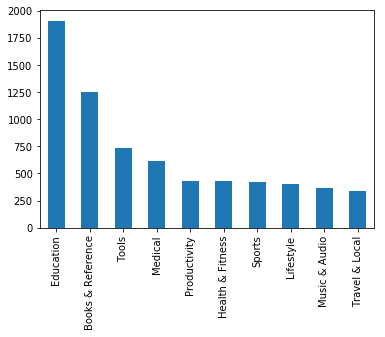

In [39]:
#второй вариант- категории, которые содержат наибольшее количество дорогих приложений ( из ТОП-10000)
apps_expensive = apps_not_free[["Category","App Name", "Price", "Currency", "Price_rub"]].sort_values(by="Price_rub", ascending=False).head(10000)
apps_expensive['Category'].value_counts().head(10).plot.bar()

#### Найдем ТОП   категорий с приложениями  без отзывов

In [ ]:
apps_without_feedback = apps[apps["Rating Count"] == 0]

In [33]:
# Топ категорий, содержащих самое большое количество приложений без отзывов (Rating Count = 0)
apps_without_feedback['Category'].value_counts()

Education                  111528
Business                    91652
Music & Audio               74406
Lifestyle                   62539
Tools                       56922
Entertainment               54003
Food & Drink                50555
Books & Reference           49454
Health & Fitness            49216
Shopping                    41939
Productivity                40487
Travel & Local              34923
Personalization             31201
Finance                     25711
Communication               22890
Arcade                      22392
Casual                      20288
Sports                      20259
Social                      18801
Puzzle                      18330
Medical                     17255
News & Magazines            17078
Photography                 12541
Maps & Navigation           11313
Art & Design                 9368
Events                       8916
Action                       8714
Educational                  8648
House & Home                 8631
Auto & Vehicle

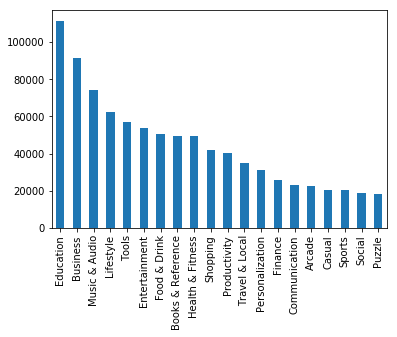

In [40]:
apps_without_feedback['Category'].value_counts().head(20).plot.bar()